In [2]:
library(dviz.supp)
library(forcats)
library(ggridges)

Loading required package: cowplot

Loading required package: colorspace

Loading required package: colorblindr

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘dviz.supp’


The following objects are masked from ‘package:cowplot’:

    plot_grid, stamp, stamp_bad, stamp_good, stamp_ugly, stamp_wrong


The following object is masked from ‘package:datasets’:

    CO2



Attaching package: ‘ggridges’


The following object is masked from ‘package:dviz.supp’:

    Aus_athletes




In [3]:
lincoln_weather %>%
  mutate(
	month_short = fct_recode(
  	Month,
  	Jan = "January",
  	Feb = "February",
  	Mar = "March",
  	Apr = "April",
  	May = "May",
  	Jun = "June",
  	Jul = "July",
  	Aug = "August",
  	Sep = "September",
  	Oct = "October",
  	Nov = "November",
  	Dec = "December"
	)
  ) %>%
  mutate(month_short = fct_rev(month_short)) -> lincoln_df


In [4]:
head(lincoln_df)

CST,Max Temperature [F],Mean Temperature [F],Min Temperature [F],Max Dew Point [F],Mean Dew Point [F],Min Dewpoint [F],Max Humidity,Mean Humidity,Min Humidity,⋯,Min Visibility [Miles],Max Wind Speed [MPH],Mean Wind Speed[MPH],Max Gust Speed [MPH],Precipitation [In],CloudCover,Events,WindDir [Degrees],Month,month_short
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<fct>,<fct>
2016-1-1,37,24,11,19,13,8,88,68,47,⋯,10,20,9,23,0,0,NA,280,January,Jan
2016-1-2,41,23,5,22,14,4,100,72,44,⋯,10,15,6,18,0,0,NA,312,January,Jan
2016-1-3,37,23,8,23,15,8,92,73,54,⋯,10,13,5,14,0,0,NA,330,January,Jan
2016-1-4,30,17,4,24,13,2,92,82,72,⋯,6,17,7,23,0,1,NA,155,January,Jan
2016-1-5,38,29,19,29,25,19,96,83,70,⋯,5,22,13,28,0,4,NA,178,January,Jan
2016-1-6,34,33,32,33,32,29,100,91,82,⋯,0,16,7,21,T,8,Fog,167,January,Jan


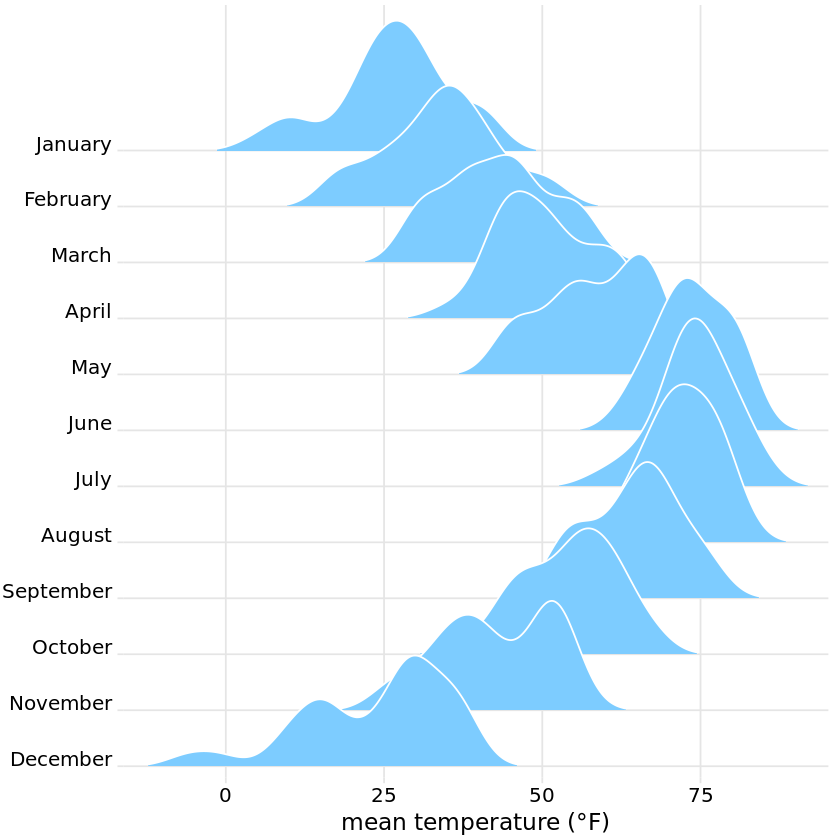

In [5]:
bandwidth <- 3.4

ggplot(lincoln_df, aes(x = `Mean Temperature [F]`, y = `Month`)) +
  geom_density_ridges(
	scale = 3, rel_min_height = 0.01,
	bandwidth = bandwidth, fill = lighten("#56B4E9", .3), color = "white"
  ) +
  scale_x_continuous(
	name = "mean temperature (°F)",
	expand = c(0, 0), breaks = c(0, 25, 50, 75)
  ) +
  scale_y_discrete(name = NULL, expand = c(0, .2, 0, 2.6)) +
  theme_dviz_grid() +
  theme(
	axis.text.y = element_text(vjust = 0),
	plot.margin = margin(3, 7, 3, 1.5)
  )
